<a href="https://colab.research.google.com/github/maya-25/Sentimental-analysis-of-Covid-19-vaccine-tweets/blob/main/Sentimental_analysis_Covid_19_vaccines_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
df = pd.read_csv("vaccination_all_tweets.csv")
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1.337860e+18,eli�����,Your Bed,"heil, hydra �☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [10]:
print(df.columns)
print(df.shape)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
(56585, 16)


In [11]:

df.dropna(subset=['hashtags'], how='all', inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44347 entries, 0 to 56584
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                44347 non-null  float64
 1   user_name         44347 non-null  object 
 2   user_location     34137 non-null  object 
 3   user_description  41363 non-null  object 
 4   user_created      44347 non-null  object 
 5   user_followers    44347 non-null  int64  
 6   user_friends      44347 non-null  int64  
 7   user_favourites   44347 non-null  int64  
 8   user_verified     44347 non-null  bool   
 9   date              44347 non-null  object 
 10  text              44347 non-null  object 
 11  hashtags          44347 non-null  object 
 12  source            44294 non-null  object 
 13  retweets          44347 non-null  int64  
 14  favorites         44347 non-null  int64  
 15  is_retweet        44347 non-null  bool   
dtypes: bool(2), float64(1), int64(5), object

In [13]:
df.drop(columns=['id'], inplace=True)

In [14]:
def clean_data(tex):
    tex = re.sub(r'@\w+', ' ', tex)
    tex = re.sub(r'#', ' ', tex)
    tex = re.sub(r'RT[\s]+', ' ', tex)
    tex = re.sub(r'https?:\/\/\S+', ' ', tex)
    tex = tex.lower()
    
    return tex

In [15]:
df['text'] = df['text'].apply(clean_data)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli�����,Your Bed,"heil, hydra �☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,coronavirus sputnikv astrazeneca pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,explain to me again why we need a vaccine ...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,6/10/2013 17:49,2731,5001,69344,False,12/12/2020 20:06,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",3/25/2019 4:14,21924,593,7815,True,12/12/2020 20:04,there have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False


In [17]:
df['date'] = pd.to_datetime(df['date']).dt.date
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,2020-12-20,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli�����,Your Bed,"heil, hydra �☺",6/25/2020 23:30,10,88,155,False,2020-12-12,coronavirus sputnikv astrazeneca pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,2020-12-12,explain to me again why we need a vaccine ...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,6/10/2013 17:49,2731,5001,69344,False,2020-12-12,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",3/25/2019 4:14,21924,593,7815,True,2020-12-12,there have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56580,CNBC-TV18,India,The CNBC-TV18 news ticker on Twitter. The news...,6/5/2009 6:48,990551,523,206,True,2021-04-05,russian direct investment fund and panacea bio...,['SputnikV'],Twitter Web App,3,60,False
56581,Mandrake,NaN,OSINT from hell. #OSINT #liberitarian not allw...,3/17/2015 13:41,49,418,2898,False,2021-04-05,[bad joke] help! can i apply for asylum in the...,['COVID19de'],Twitter Web App,0,0,False
56582,Ahmad Ismail,France,Research Consultant: Political-Economy Analysi...,5/31/2014 12:05,307,1252,1629,False,2021-04-05,russia's rdif signed a contract with indi...,"['RDIF', 'India', 'Panacea', 'SputnikV']",Twitter for Android,6,11,False
56583,FC Zenit in English✨,"Saint Petersburg, Russia",The official Twitter of FC Zenit in English! �...,7/31/2012 9:50,55125,846,33562,True,2021-04-05,it's matchday and sputnikv covid-19 vaccinati...,['SputnikV'],Twitter Web App,11,47,False


In [18]:
df.describe()

,user_followers,user_friends,user_favourites,retweets,favorites
count,4.434700e+04,44347.000000,4.434700e+04,44347.000000,44347.000000
mean,1.186667e+05,1359.562721,1.618463e+04,3.225156,14.401357
std,9.216525e+05,6349.037669,4.575968e+04,49.748353,207.376765
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.290000e+02,148.000000,3.720000e+02,0.000000,0.000000
50%,5.920000e+02,428.000000,2.345000e+03,0.000000,1.000000
75%,2.924500e+03,1225.500000,1.193500e+04,1.000000,4.000000
max,1.497539e+07,516808.000000,1.220826e+06,7695.000000,22815.000000


In [19]:
df.drop('is_retweet',
  axis='columns', inplace=True)

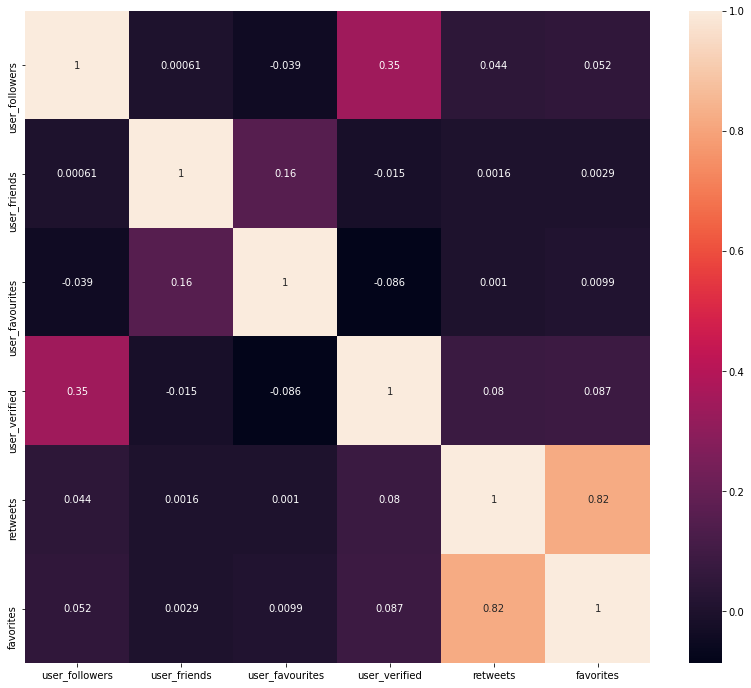

In [20]:
fig=plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)
plt.show()
fig.savefig("CovidData_heatmap.png")

In [21]:
df.corr(method='pearson')

,user_followers,user_friends,user_favourites,user_verified,retweets,favorites
user_followers,1.000000,0.000606,-0.039310,0.345528,0.044020,0.051563
user_friends,0.000606,1.000000,0.158133,-0.014834,0.001598,0.002885
user_favourites,-0.039310,0.158133,1.000000,-0.085908,0.001035,0.009941
user_verified,0.345528,-0.014834,-0.085908,1.000000,0.079702,0.087330
retweets,0.044020,0.001598,0.001035,0.079702,1.000000,0.821256
favorites,0.051563,0.002885,0.009941,0.087330,0.821256,1.000000


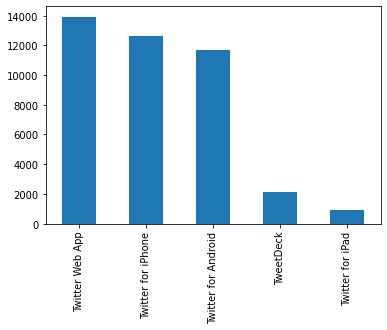

In [22]:
#which platform mostly people used for tweets

df['source'].value_counts().head(n=5).plot.bar()

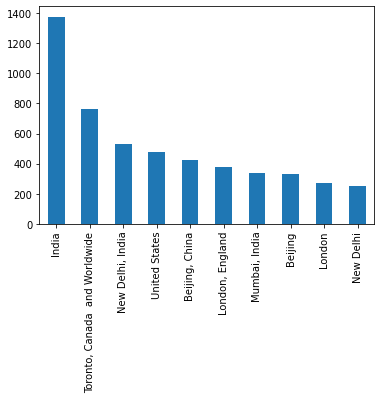

In [23]:
#From which location the people tweet the most
df['user_location'].value_counts().head(n=10).plot.bar()

In [24]:
# what are the top 10 most retweeted tweets
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

,text,date,user_name,user_location,hashtags,favorites,retweets
46053,why we need two doses of mrna vaccine � vaccines covid19 pfizer moderna vaccinessavelives vaccinated,2021-04-01,hotvickkrishna,"Manhattan, NY","['vaccines', 'COVID19', 'Pfizer', 'moderna', 'VaccinesSaveLives', 'vaccinated']",19622,7695
17118,"got my jab. for the curious, it was covaxin. \n\nfelt secure, will travel safely.",2021-03-01,Dr. S. Jaishankar,"New Delhi, India",['Covaxin'],22815,2360
7126,"new research published in microbiology &amp; infectious diseases, immunologist j. bart classen warns mrna technology u…",2021-02-10,Robert F. Kennedy Jr,"Los Angles, California",['mRNA'],3090,2247
24268,"covaxin �� , made by hyderabad-based bharat biotech international limited, has been declared ""safe, immunogenic wi…",2021-03-09,Megh Updates �,Turn on Notification �,['Covaxin'],9458,2095
32826,a batch of fake sputnik v vaccines was confiscated in mexico. see this comparison of the genuine sputnikv with a f…,2021-03-18,Sputnik V,"Moscow, Russia",['SputnikV'],3473,1980
17543,prime minister narendra modi choose early morning time to take covaxin . no traffic was stopped . traveled normall…,2021-03-01,Megh Updates �,Turn on Notification �,['covaxin'],8153,1980
23715,this is not a queue for a covid vaccine\nthis is a queue at a food bank today in the uk.\n coronavirus oxfordvaccine…,2021-03-08,Afshin Rattansi,London,"['coronavirus', 'oxfordvaccine']",1713,1515
55201,breaking news : sputnikv approved for emergency use in india.,2021-04-12,Sudhir Chaudhary,"ÜT: 28.562395,77.33867",['SputnikV'],12013,1361
47094,the gamaleya institute: we are sad to hear this. sputnikv is 91.6% effective against infection and 100%…,2021-04-03,Sputnik V,"Moscow, Russia",['SputnikV'],6211,1299
54796,sputnikv vaccine has been approved for emergency use in india after bridge study by reddy labs . all who are advoc…,2021-04-12,B L Santhosh,"New Delhi, India",['SputnikV'],4588,1124


In [25]:
#Sentiment analysis of Covid-19 vaccine tweets.we will use text blob API for finding the polarity and subjectivity.
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,polarity,subjectivity
0,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me �‍�",4/8/2009 17:52,405,1692,3247,False,2020-12-20,same folks said daikon paste could treat a cytokine storm pfizerbiontech,['PfizerBioNTech'],Twitter for Android,0,0,0.000,0.125000
2,eli�����,Your Bed,"heil, hydra �☺",6/25/2020 23:30,10,88,155,False,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine is created to last 2-4 years…,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,0.000,0.033333
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,4/23/2020 17:58,152,580,1473,False,2020-12-12,explain to me again why we need a vaccine whereareallthesickpeople pfizerbiontech…,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,0.000,0.000000
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",6/10/2013 17:49,2731,5001,69344,False,2020-12-12,"it is a bit sad to claim the fame for success of vaccination on patriotic competition between usa, canada, uk and…",['vaccination'],Twitter Web App,0,4,-0.100,0.500000
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emerging Infections, & Health Policy MD| U.S. Congress COVID-19 expert witness x 2 | ELBI 2020 @JHSPH_CHS",3/25/2019 4:14,21924,593,7815,True,2020-12-12,there have not been many bright days in 2020 but here are some of the best \n1. bidenharris winning election2020…,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,0.675,0.587500


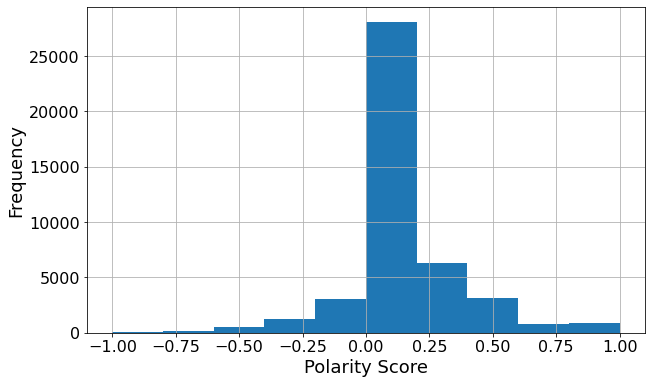

In [27]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("polarity_hist.png")

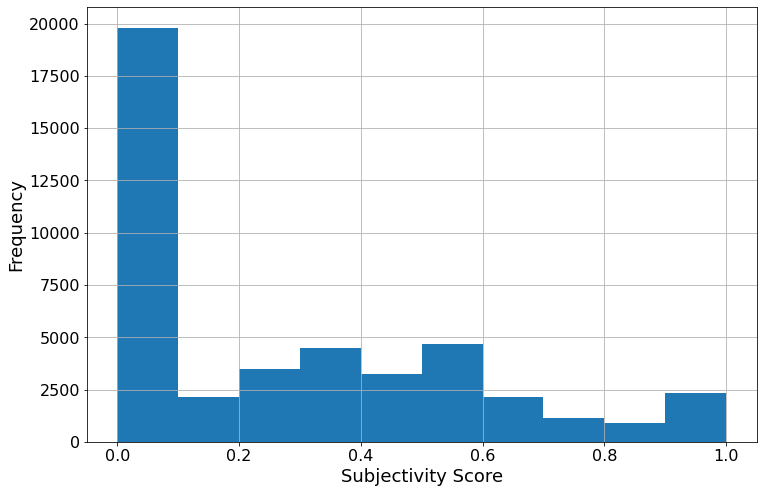

In [28]:
fig = plt.figure(figsize=(12, 8))
df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("subjectivity_hist.png")

In [29]:
#inspection of most positive and most positive tweets
df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,"me and hubby, feel great and grateful! moderna",1.0,0.75
1,sounds awesome..... i'll pass\n covid19 \n moderna \n doublemask,1.0,1.00
2,"covid19 p1 varient cause surge in mortality rate in brazil ,even best vaccines are ineffective in it.\n covid19…",1.0,0.30
3,"trudeau would rather that canadian's die unvaxxed then call russia for the world's best vaccine, sputnikv",1.0,0.30
4,a wonderful update by ranp at our webinar with on the practicalities and important…,1.0,1.00
5,excellent! india should make it compulsory for anyone coming from china to take covaxin and be quarantine…,1.0,1.00
6,"scandalous that cdn's are being denied the best &amp; safest vaccine- sputnikv? r ,…",1.0,0.30
7,great explanation of the moderna vaccine by a manitoba physician!,1.0,0.75
8,"turks are very proud of them ,\n covidvaccine pfizerbiontech",1.0,1.00
9,wonderful that mr modi has taken the covaxin shot but can you please publish results of phase 3 trials…,1.0,1.00


In [ ]:
def deEmojify(tex):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',tex)

In [ ]:
df['text']=df['text'].apply(deEmojify)

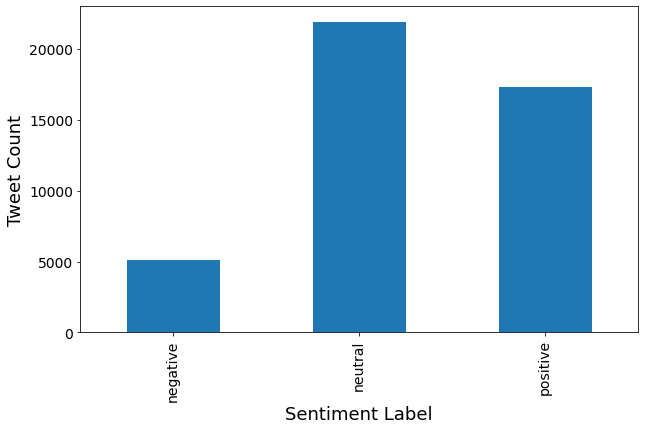

<Figure size 432x288 with 0 Axes>

In [30]:
# polarity values ranging from -1 to 1 and sunjectivity range from 0 to 1. Converting the data to 3 classes (negative, neutral, and positive)
criteria = [df['polarity'].between(-1, -0.01), df['polarity'].between(-0.01, 0.01), df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()
fig.savefig("sentiment_value_counts.png", bbox_inches='tight');

In [31]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,polarity,subjectivity,sentiment
0,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me �‍�",4/8/2009 17:52,405,1692,3247,False,2020-12-20,same folks said daikon paste could treat a cytokine storm pfizerbiontech,['PfizerBioNTech'],Twitter for Android,0,0,0.000,0.125000,neutral
2,eli�����,Your Bed,"heil, hydra �☺",6/25/2020 23:30,10,88,155,False,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine is created to last 2-4 years…,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,0.000,0.033333,neutral
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,4/23/2020 17:58,152,580,1473,False,2020-12-12,explain to me again why we need a vaccine whereareallthesickpeople pfizerbiontech…,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,0.000,0.000000,neutral
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",6/10/2013 17:49,2731,5001,69344,False,2020-12-12,"it is a bit sad to claim the fame for success of vaccination on patriotic competition between usa, canada, uk and…",['vaccination'],Twitter Web App,0,4,-0.100,0.500000,negative
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emerging Infections, & Health Policy MD| U.S. Congress COVID-19 expert witness x 2 | ELBI 2020 @JHSPH_CHS",3/25/2019 4:14,21924,593,7815,True,2020-12-12,there have not been many bright days in 2020 but here are some of the best \n1. bidenharris winning election2020…,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,0.675,0.587500,positive


In [32]:
df.isna().sum()

user_name               0
user_location       10210
user_description     2984
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags                0
source                 53
retweets                0
favorites               0
polarity                0
subjectivity            0
sentiment               0
dtype: int64

In [33]:
encoding = {'negative': 0,
            'neutral': 1,
            'positive':2
           }

labels = ['Negative', 'Neutral', 'Positive']
           
df.replace(encoding, inplace=True)

In [34]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,polarity,subjectivity,sentiment
0,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me �‍�",4/8/2009 17:52,405,1692,3247,False,2020-12-20,same folks said daikon paste could treat a cytokine storm pfizerbiontech,['PfizerBioNTech'],Twitter for Android,0,0,0.000,0.125000,1
2,eli�����,Your Bed,"heil, hydra �☺",6/25/2020 23:30,10,88,155,False,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine is created to last 2-4 years…,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,0.000,0.033333,1
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,4/23/2020 17:58,152,580,1473,False,2020-12-12,explain to me again why we need a vaccine whereareallthesickpeople pfizerbiontech…,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,0.000,0.000000,1
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",6/10/2013 17:49,2731,5001,69344,False,2020-12-12,"it is a bit sad to claim the fame for success of vaccination on patriotic competition between usa, canada, uk and…",['vaccination'],Twitter Web App,0,4,-0.100,0.500000,0
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emerging Infections, & Health Policy MD| U.S. Congress COVID-19 expert witness x 2 | ELBI 2020 @JHSPH_CHS",3/25/2019 4:14,21924,593,7815,True,2020-12-12,there have not been many bright days in 2020 but here are some of the best \n1. bidenharris winning election2020…,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,0.675,0.587500,2


In [35]:
df.to_csv("Dataset_Covid_vaccine_classification.csv")

In [54]:
def removestopwords(tweet):
  tweet = tweet.split()
  tweet = " ".join([word for word in tweet if not word in stop_words])
    
  return tweet


In [55]:
stop_words = stopwords.words('english')

df['text'] = df['text'].apply(removestopwords)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,polarity,subjectivity,sentiment
0,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me �‍�",4/8/2009 17:52,405,1692,3247,False,2020-12-20,folks said daikon paste could treat cytokine storm pfizerbiontech,['PfizerBioNTech'],Twitter for Android,0,0,0.000,0.125000,1
2,eli�����,Your Bed,"heil, hydra �☺",6/25/2020 23:30,10,88,155,False,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 2-4 years…,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,0.000,0.033333,1
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,4/23/2020 17:58,152,580,1473,False,2020-12-12,explain need vaccine whereareallthesickpeople pfizerbiontech…,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,0.000,0.000000,1
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stopped",6/10/2013 17:49,2731,5001,69344,False,2020-12-12,"bit sad claim fame success vaccination patriotic competition usa, canada, uk and…",['vaccination'],Twitter Web App,0,4,-0.100,0.500000,0
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emerging Infections, & Health Policy MD| U.S. Congress COVID-19 expert witness x 2 | ELBI 2020 @JHSPH_CHS",3/25/2019 4:14,21924,593,7815,True,2020-12-12,many bright days 2020 best 1. bidenharris winning election2020…,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,0.675,0.587500,2


In [36]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'polarity', 'subjectivity', 'sentiment'],
      dtype='object')

In [39]:
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize

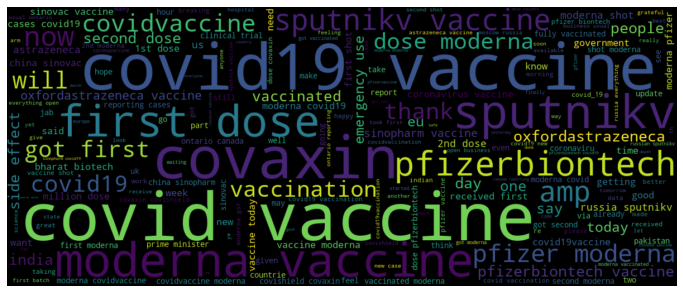

In [42]:
#generating word clouds for the analysing people fededback on COVID-19 vaccine
words = ' '.join([word for word in df['text']])
word_cloud = WordCloud(width=1200, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
fig.savefig("wordcloud.png")

In [76]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

In [59]:
X_data = df['text'].copy()
y_data = df['sentiment'].copy()

In [97]:
#now tokenise the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)

X = tokenizer.texts_to_sequences(X_data)

vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("\nExample:\n")
print("Sentence:\n{}".format(X_data[6]))
print("\nAfter tokenizing :\n{}".format(X[6]))

X = pad_sequences(X, padding='post')
print("\nAfter padding :\n{}".format(X[6]))

Vocabulary size: 37530

Example:

Sentence:
bit sad claim fame success vaccination patriotic competition usa, canada, uk and…

After tokenizing :
[18, 474, 183, 51, 40, 258, 53, 72, 3568, 1236, 521, 11147]

After padding :
[   18   474   183    51    40   258    53    72  3568  1236   521 11147
     0     0     0     0     0     0     0     0     0     0     0     0]


In [98]:
import pickle
pickle.dump(X,open('X-model.pkl','wb'))

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.25, random_state=0)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33260, 24), (11087, 24), (33260,), (11087,))

In [79]:
tf.keras.backend.clear_session()

# hyper parameters
EPOCHS = 2
BATCH_SIZE = 32
embedding_dim = 16
units = 256

model = tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_dim, input_length=X_train.shape[1]),
    L.Bidirectional(L.LSTM(units,return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64, activation="relu"),
    L.Dropout(0.4),
    L.Dense(3)
])

In [80]:
#compiling model with loss function and optimiser
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 24, 16)            600480    
_________________________________________________________________
bidirectional (Bidirectional (None, 24, 512)           559104    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [81]:
checkpoint = ModelCheckpoint("best_model_COVID.hdf5", monitor='loss', verbose=1,
    save_best_only=False, mode='auto', period=1)

In [82]:
Covid_model = model.fit(X_train, y_train,epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint])


Epoch 1/2
1040/1040 [==============================] - 172s 162ms/step - loss: 0.7287 - accuracy: 0.6763 - val_loss: 0.3093 - val_accuracy: 0.9088

Epoch 00001: saving model to best_model_COVID.hdf5
Epoch 2/2
1040/1040 [==============================] - 167s 161ms/step - loss: 0.2466 - accuracy: 0.9287 - val_loss: 0.2938 - val_accuracy: 0.9176

Epoch 00002: saving model to best_model_COVID.hdf5


In [85]:
pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [86]:
pred

array([2, 1, 1, ..., 1, 1, 1])

In [87]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.2937680780887604
Test Accuracy: 0.9175611138343811


In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [90]:
print(classification_report(y_test, pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.84      0.77      0.80      1265
     Neutral       0.93      0.96      0.94      5417
    Positive       0.93      0.91      0.92      4405

    accuracy                           0.92     11087
   macro avg       0.90      0.88      0.89     11087
weighted avg       0.92      0.92      0.92     11087



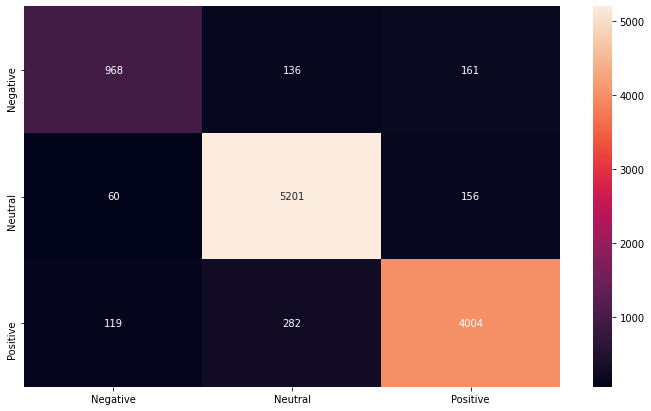

In [91]:
conf = confusion_matrix(y_test, pred)

cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [94]:
tf.__version__

'2.4.1'

In [96]:
tf.keras.__version__

'2.4.0'